Importing required libraries to predict acceleration using random forest, calculate RMSE (RootMeanSquaredError), and create plots to compare predicted and actual acceleration

In [37]:
import pandas as pd
import numpy as np

#import src
import FileProcessing
import ModelClass
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D, Bidirectional, RepeatVector, Dense, TimeDistributed # for creating layers inside the Neural Network

import tensorflow
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from pathlib import Path
import random
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import FileProcessing
import RFmodel

from sklearn.neighbors import KNeighborsRegressor


In [2]:
fileProcessing=FileProcessing.FileProcessing()

In [3]:
model_obj=ModelClass.ModelClass()
file=FileProcessing.FileProcessing()

In [4]:
file_name='Cleaned_NGSIM_Data'
ngsim=fileProcessing.read_input(file_name)

original File path: c:\Users\StudentAccount\Python\Capstone\gitcodelocation\DataDrivenCarFollowing\datadrivencarfollowing-v1\scripts
Data File path: c:\Users\StudentAccount\Python\Capstone\gitcodelocation\DataDrivenCarFollowing\datadrivencarfollowing-v1\data


In [5]:
def fit_and_run_KNN(df, time_frame):
    shift_instance = time_frame*10
    df, train_df, val_df, test_df, X_train, y_train, X_val, y_val, X_test, y_test = model_obj.preprocessing(df, shift_instance)
    return df, train_df, val_df, test_df, X_train, y_train, X_val, y_val, X_test, y_test

In [6]:
def define_KNN( input_df):
    model = KNeighborsRegressor(n_neighbors=5)
    #model = SVR(kernel='linear')

    return model

In [7]:
delta_time=0.1
ngsim_1, train_df_1, val_df_1, test_df_1, X_train_1, y_train_1, X_val_1, y_val_1, X_test_1, y_test_1= fit_and_run_KNN(ngsim, delta_time)

In [8]:
model=define_KNN(train_df_1)

In [9]:
ngsim=ngsim_1
train_df= train_df_1
val_df=val_df_1,
test_df= test_df_1
X_train= X_train_1
y_train=y_train_1
X_val=X_val_1
y_val=y_val_1
X_test=X_test_1
y_test=y_test_1
time_frame=delta_time
reaction_time=delta_time

In [10]:

def fit_KNN(model, X_train, y_train, reaction_time):
    modelName = "SVM_model" + str(reaction_time) + ".keras"
    save_callback = keras.callbacks.ModelCheckpoint(
        modelName, save_best_only=True)
    early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_accuracy', verbose=1, patience=7)
        
    model.fit(X_train, y_train)
    return model


In [75]:
model=fit_KNN( model,X_train, y_train, reaction_time)

In [76]:
import pickle 
pickle.dump(model, open('knn_0.1.pkg', 'wb'))

In [30]:

predict_on_pair = model_obj.prediction_test_pairs(test_df, 10, 12)
print(f"Prediction being done on :{predict_on_pair[0]}")
target_variable = 'nextframeAcc'

Prediction being done on :477-484


In [41]:
predict_on_pair

['477-484', '496-503']

j: 0 input:[[12.94079208  2.          2.          0.097536    9.62253571]],subject localy:54.35163116455078,preceding_local_y:71.8148422241211,spacing:12.940792083740234 pred_acc: 0.10119360685348511
row 0=s_subject:0.962759538590908
j: 1 input:[[ 1.29305300e+01  2.00000000e+00  2.00000000e+00 -2.07336545e-03
   9.63265507e+00]],subject localy:55.31439070314169,preceding_local_y:72.76612091064453,spacing:12.93053002744913 pred_acc: -0.10911840200424194
j: 2 input:[[12.96176763  2.          2.         -9.68349648  0.        ]],subject localy:56.27711061775685,preceding_local_y:73.76007843017578,spacing:12.961767632365223 pred_acc: 2.0531327724456787
j: 3 input:[[13.92777455  2.          2.         -9.43965626  0.        ]],subject localy:56.287376281619075,preceding_local_y:74.7363510131836,spacing:13.927774551510808 pred_acc: 2.0531327724456787
j: 4 input:[[14.84074955  2.          2.         -9.02208042  0.        ]],subject localy:56.2976419454813,preceding_local_y:75.65959167480469,

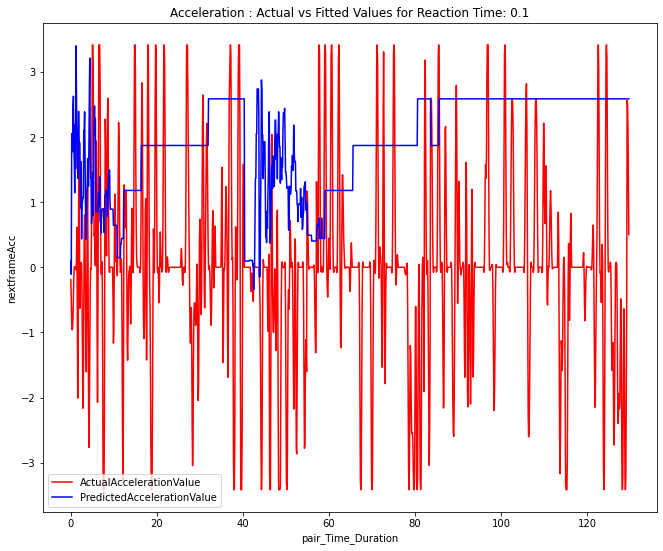

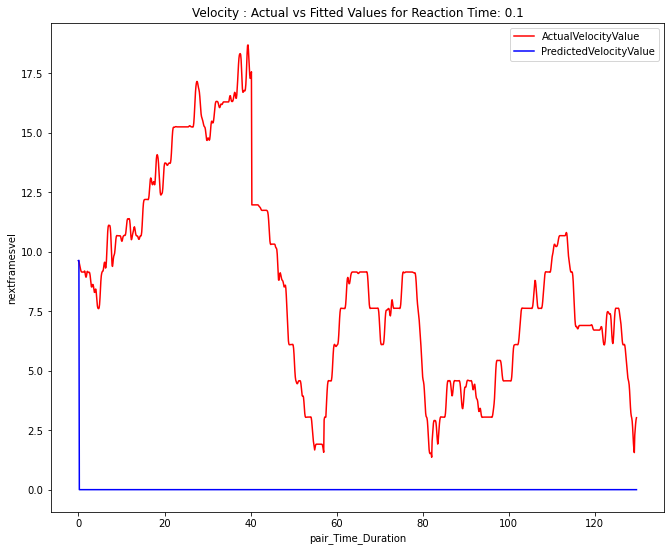

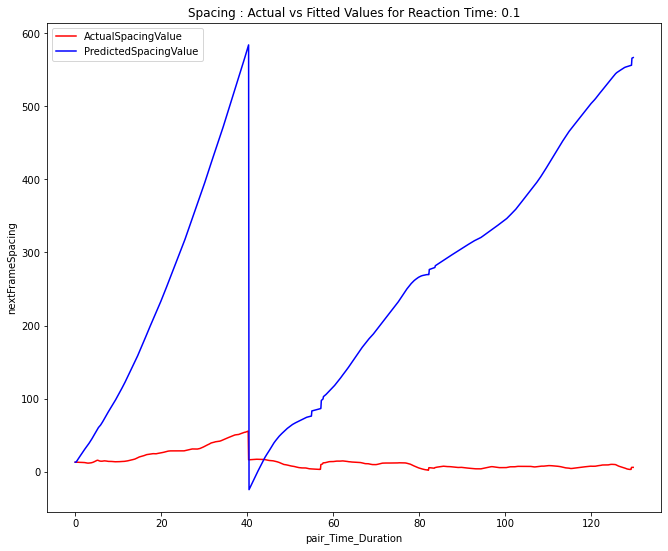

In [77]:
predicted_data_model_class=model_obj.prediction(test_df, predict_on_pair, target_variable, model, time_frame)
model_obj.plot_prediction(predicted_data_model_class, 'pair_Time_Duration',
                        'predicted_acceleration', 'nextframeAcc', 'Acceleration', delta_time)
model_obj.plot_prediction(predicted_data_model_class, 'pair_Time_Duration',
                        'predicted_velocity', 'nextframesvel', 'Velocity', delta_time)
model_obj.plot_prediction(predicted_data_model_class, 'pair_Time_Duration',
                        'predicted_spacing', 'nextFrameSpacing', 'Spacing', delta_time)
